# Wine Classification Using PCA

## Preparing Analysis

### Libraries

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = load_wine()

In [3]:
df_wine = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df_wine['target'] = data['target']

In [4]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Data Exploration

### Target Info

In [5]:
df_wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [6]:
df_wine['target'].value_counts(1)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

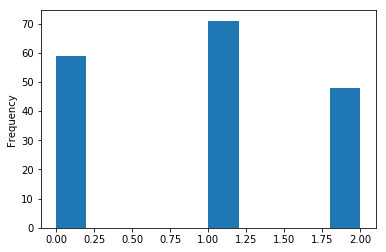

In [7]:
df_wine['target'].plot(kind='hist', )
plt.show()

### Data Information

In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


### Numerical Information

In [9]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Pairplot

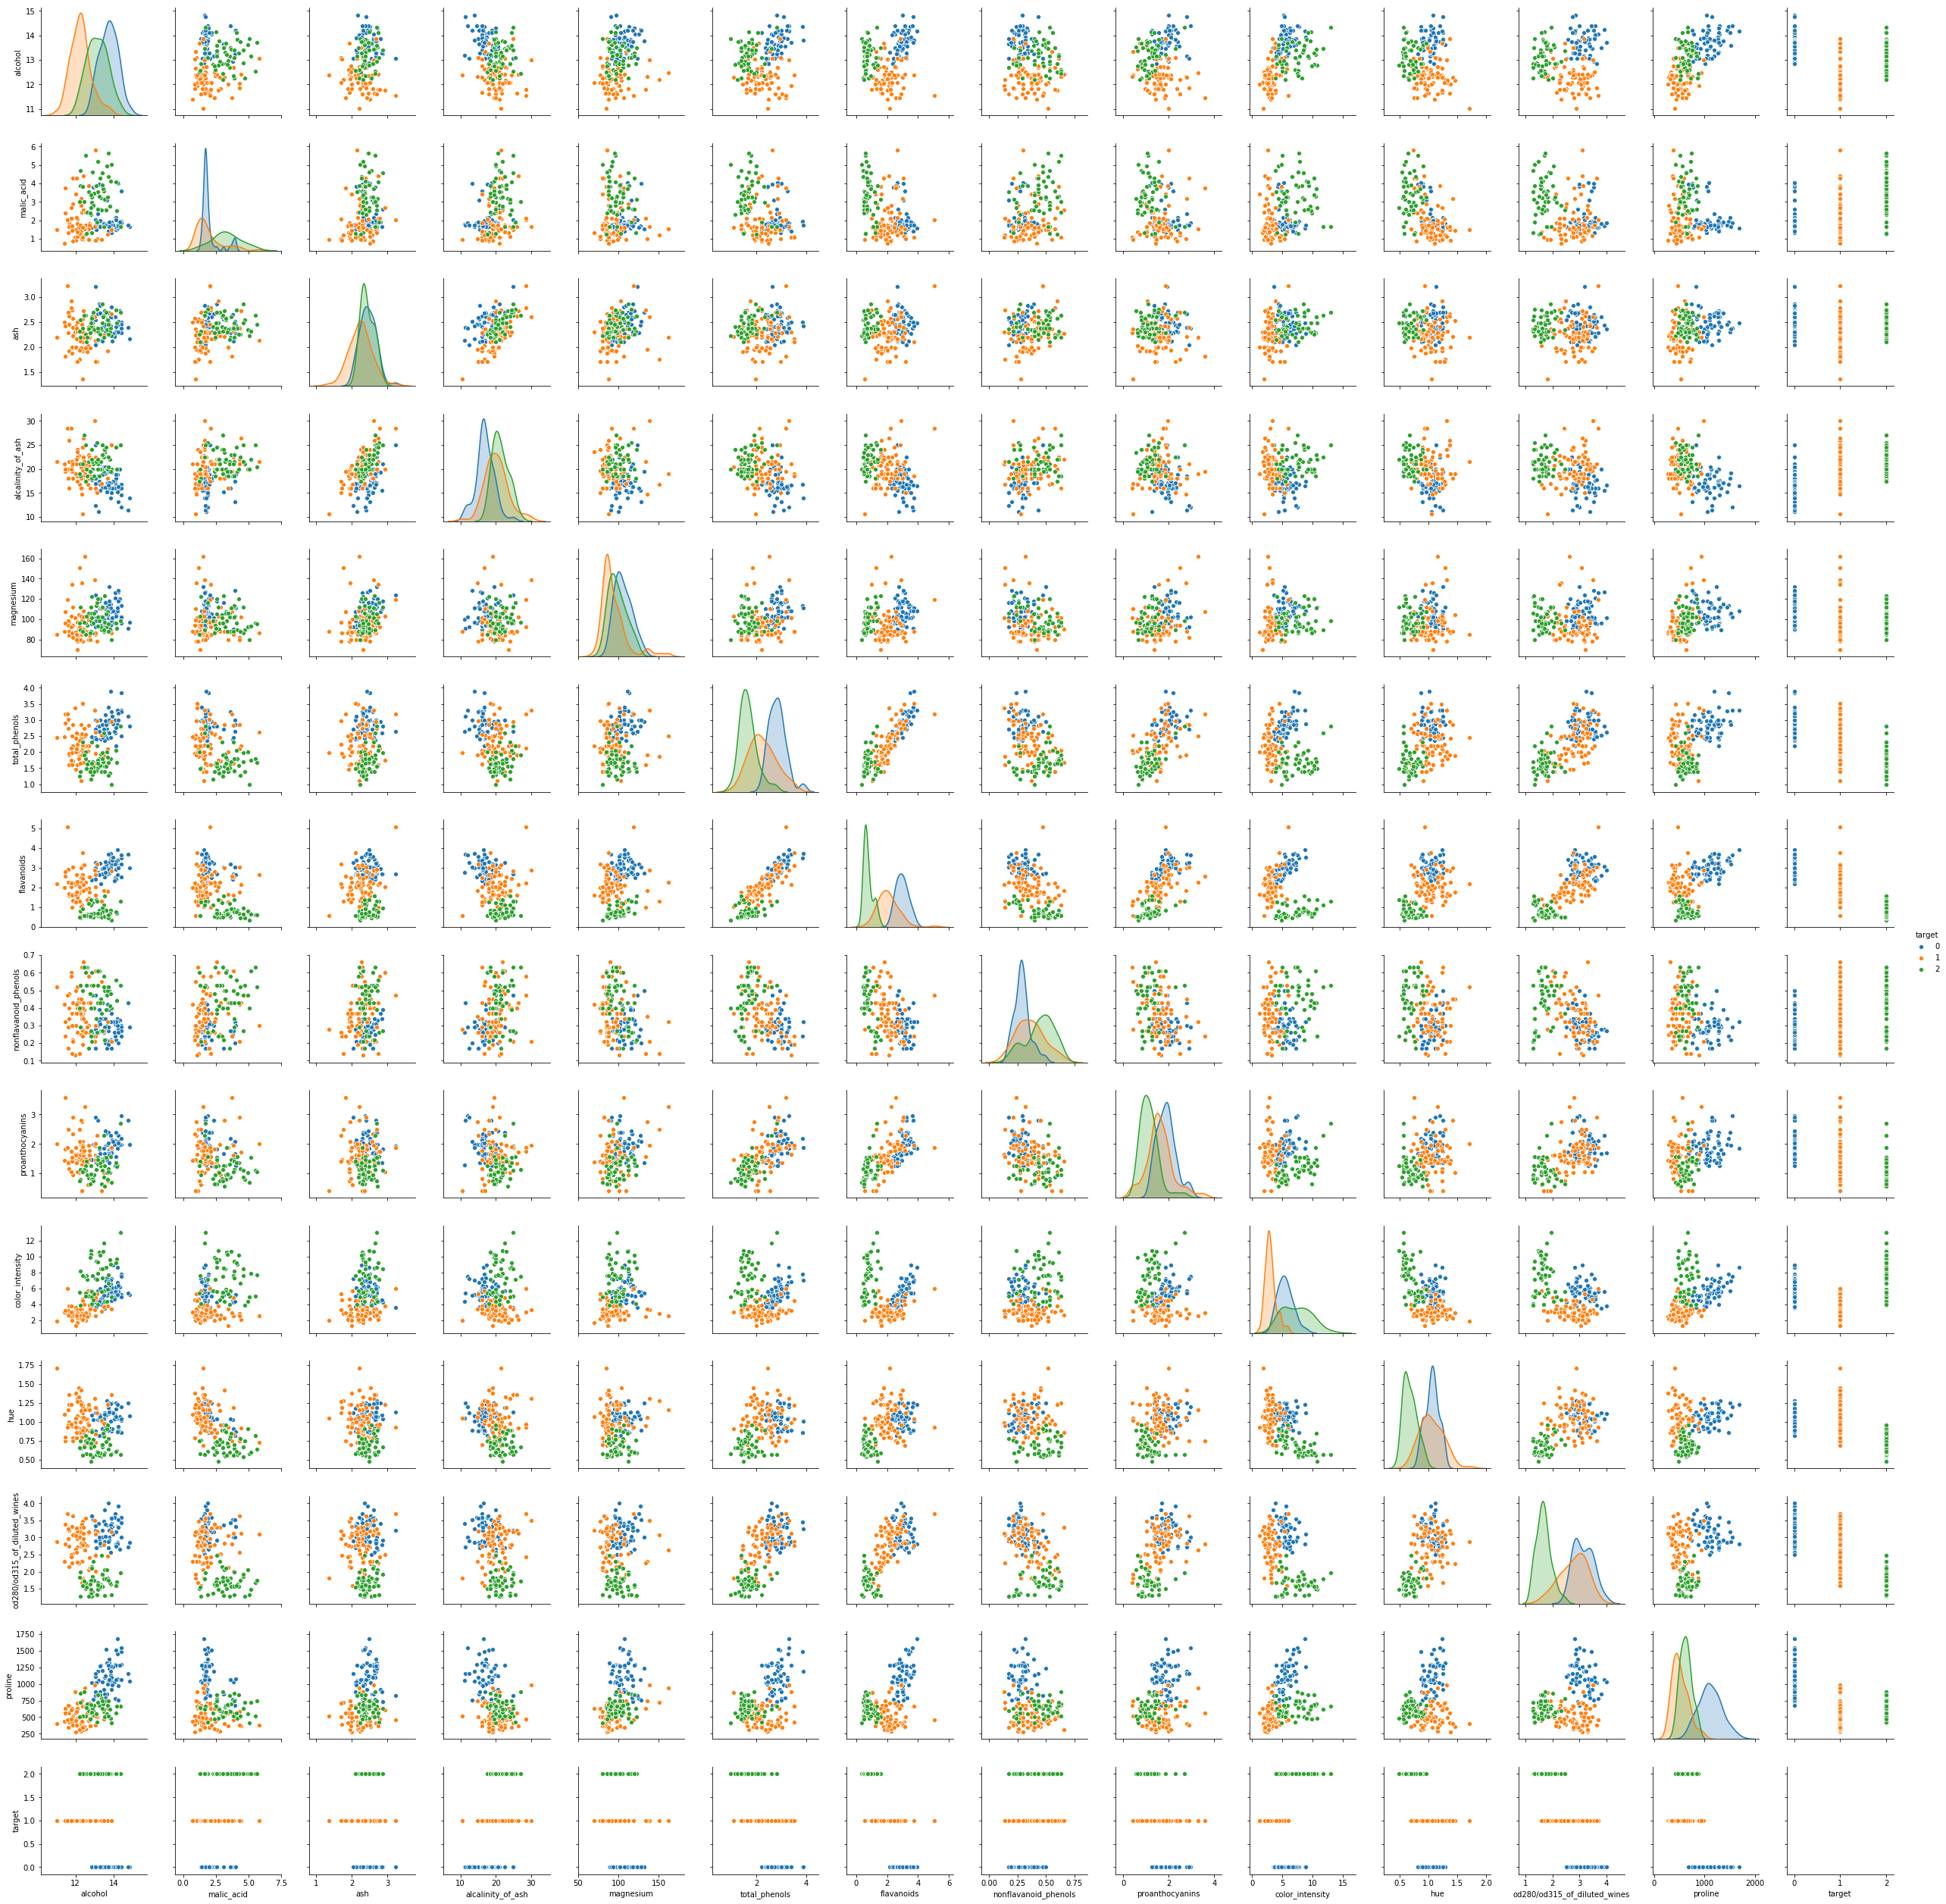

In [10]:
sns.pairplot(df_wine, hue='target')
plt.show()

### Correlation Matrix

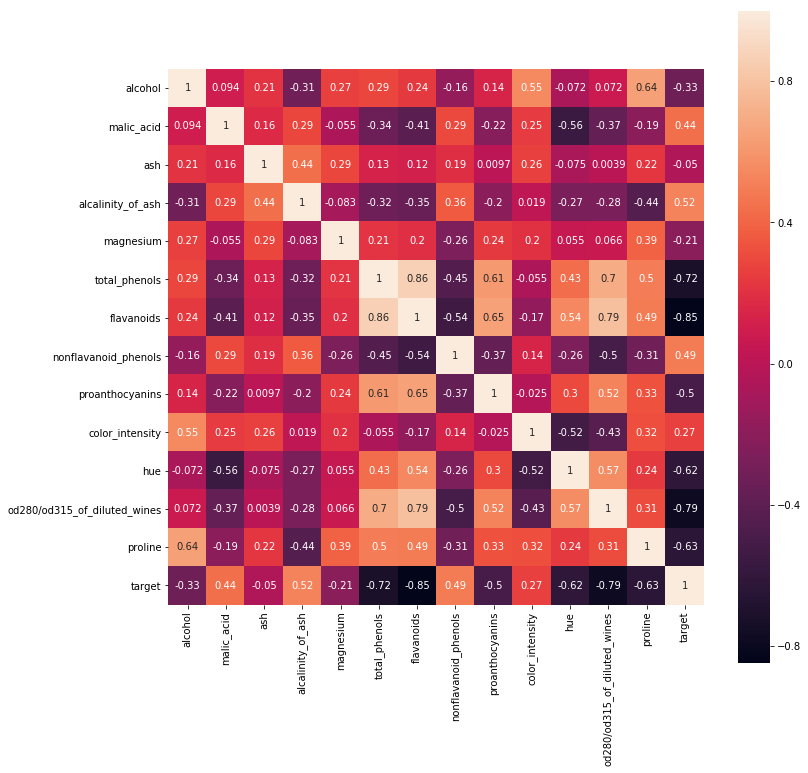

In [11]:
correl = df_wine.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correl, square=True, annot=True)

## Feature Engineering

### Splitting Data

In [12]:
X = df_wine.drop(['target'], axis=1)
y = df_wine['target']

### Standarding Data

In [13]:
sc = StandardScaler()
X_transf = sc.fit_transform(X)

In [16]:
X_transf = pd.DataFrame(data=X_transf, columns=list(X))

In [17]:
X_transf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [20]:
X_transf.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,0.0,1.0,-2.43,-0.79,0.06,0.84,2.26
malic_acid,178.0,0.0,1.0,-1.43,-0.66,-0.42,0.67,3.11
ash,178.0,-0.0,1.0,-3.68,-0.57,-0.02,0.70,3.16
alcalinity_of_ash,178.0,-0.0,1.0,-2.67,-0.69,0.00,0.60,3.15
magnesium,178.0,-0.0,1.0,-2.09,-0.82,-0.12,0.51,4.37
total_phenols,178.0,-0.0,1.0,-2.11,-0.89,0.10,0.81,2.54
flavanoids,178.0,0.0,1.0,-1.70,-0.83,0.11,0.85,3.06
nonflavanoid_phenols,178.0,-0.0,1.0,-1.87,-0.74,-0.18,0.61,2.40
proanthocyanins,178.0,-0.0,1.0,-2.07,-0.60,-0.06,0.63,3.49
color_intensity,178.0,-0.0,1.0,-1.63,-0.80,-0.16,0.49,3.44


### Splitting Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_transf, y, test_size = 0.2, random_state = 42)

### Applying PCA to reduce dimensionality

In [24]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train) #Adjusting and Fit Model
X_test = pca.transform(X_test) #Transforming data with trained model

In [25]:
print(pca.components_)

[[-0.12066745  0.26133943  0.02788356  0.2496346  -0.14687697 -0.38510351
  -0.4148827   0.30655131 -0.30951491  0.12396866 -0.30522527 -0.38583351
  -0.25469502]
 [-0.49422695 -0.19247019 -0.32757004  0.03349307 -0.27589848 -0.11126263
  -0.0290841  -0.07092196 -0.08862596 -0.52922417  0.28130703  0.13120288
  -0.36278817]]


In [26]:
print(pca.explained_variance_)

[4.83276484 2.47147595]


## Machine Learning

In [47]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

print('****Results****\n')
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", cm)

****Results****

Accuracy: 1.0

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Printing Results in a Scatter Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


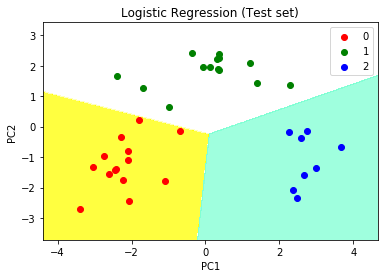

In [50]:
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
#title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show()